In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
np.random.seed(42)
data = {
    'CustomerID': range(1, 201),
    'Gender': np.random.choice(['Male', 'Female'], size=200),
    'Age': np.random.randint(18, 70, size=200),
    'Annual Income (k$)': np.random.randint(20, 150, size=200),
    'Spending Score (1-100)': np.random.randint(1, 100, size=200)
}
df = pd.DataFrame(data)

In [3]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('CustomerID', axis=1))

In [5]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [6]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)
df['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


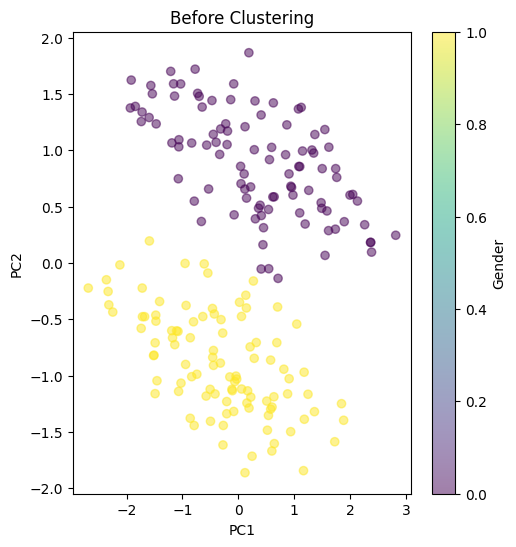

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df['Gender'], cmap='viridis', alpha=0.5)
plt.title('Before Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Gender')

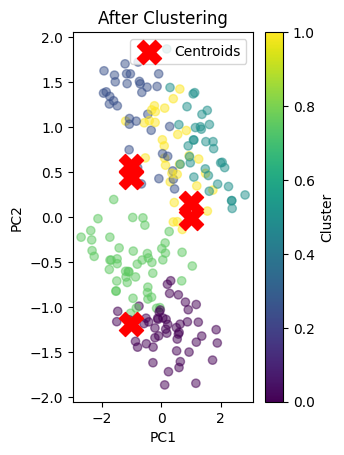

In [8]:
plt.subplot(1, 2, 2)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('After Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


In [10]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


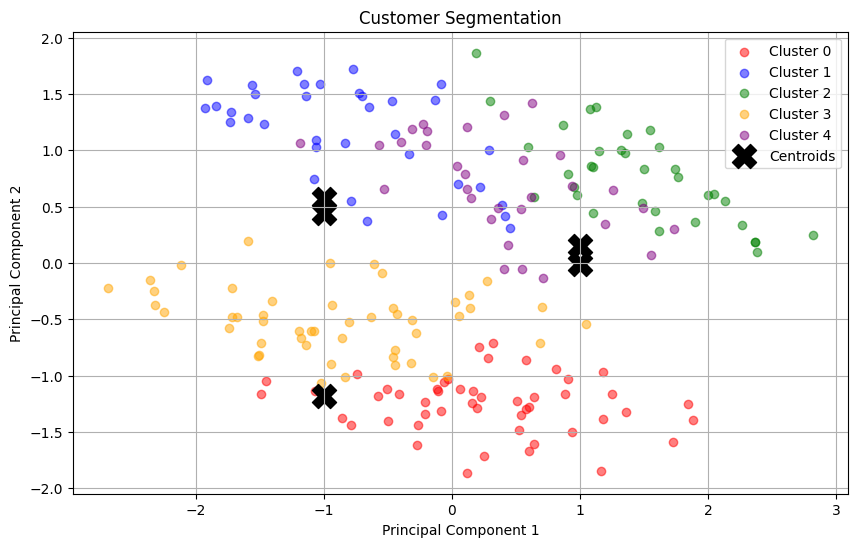

In [13]:
plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'green', 'orange', 'purple']

for cluster in range(5):
    cluster_data = principal_components[kmeans.labels_ == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster], label=f'Cluster {cluster}', alpha=0.5)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X', label='Centroids')

plt.title('Customer Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
print("Cluster Centers:")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.drop(['CustomerID', 'Cluster'], axis=1).columns))


Cluster Centers:
   Gender        Age  Annual Income (k$)  Spending Score (1-100)
0     1.0  44.260000          117.780000               53.700000
1     0.0  51.200000           74.542857               17.057143
2     0.0  26.235294          102.088235               62.176471
3     1.0  46.760000           52.320000               41.620000
4     0.0  53.096774           81.806452               71.967742
